<a href="https://colab.research.google.com/github/BelKaty/BelKatyParsing/blob/main/HW1_parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Сбор и разметка данных (семинары)
###Урок 1. Основы клиент-серверного взаимодействия. Парсинг API
1. Ознакомиться с некоторые интересными API. https://docs.ozon.ru/api/seller/
https://developers.google.com/youtube/v3/getting-started https://spoonacular.com/food-api
2. Потренируйтесь делать запросы к API. Выберите публичный API, который вас интересует, и потренируйтесь делать API-запросы с помощью Postman. Поэкспериментируйте с различными типами запросов и попробуйте получить различные типы данных.
3. Сценарий Foursquare
4. Напишите сценарий на языке Python, который предложит пользователю ввести интересующую его категорию (например, кофейни, музеи, парки и т.д.).
5. Используйте API Foursquare для поиска заведений в указанной категории.
6. Получите название заведения, его адрес и рейтинг для каждого из них.
7. Скрипт должен вывести название и адрес и рейтинг каждого заведения в консоль.

In [1]:
!sudo apt-get install gcc libyaml-dev libpython2.7-dev
!pip install pyyaml ua-parser user-agents fake-useragent

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gcc is already the newest version (4:11.2.0-1ubuntu1).
libyaml-dev is already the newest version (0.2.2-1build2).
libpython2.7-dev is already the newest version (2.7.18-13ubuntu1.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
import os
import requests
from fake_useragent import UserAgent
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

#API OZON

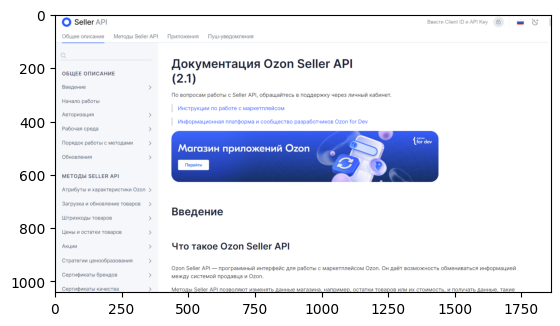

In [3]:
im = Image.open('/content/Скриншот от 2024-05-11 22-49-08.png')
plt.imshow(im)
plt.show()

#API YOUTUBE

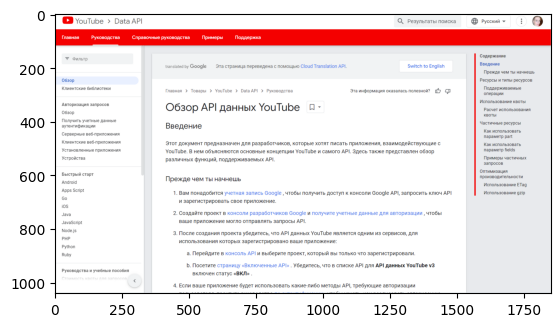

In [4]:
im = Image.open('/content/Скриншот от 2024-05-11 22-50-52.png')
plt.imshow(im)
plt.show()

#API SPOONACULAR

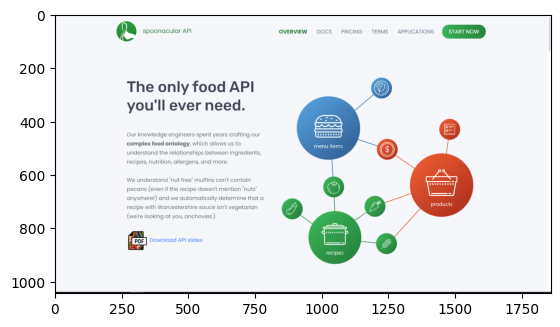

In [5]:
im = Image.open('/content/Скриншот от 2024-05-11 22-51-44.png')
plt.imshow(im)
plt.show()

#API-запросы с помощью Postman

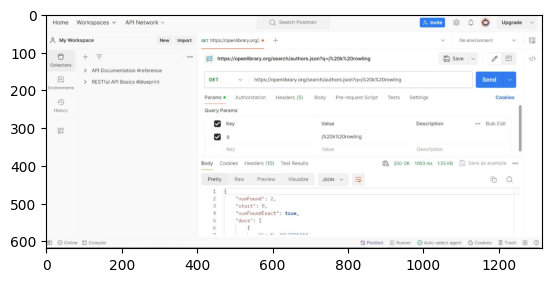

In [6]:
im = Image.open('/content/Скриншот от 2024-05-11 22-57-26.png')
plt.imshow(im)
plt.show()

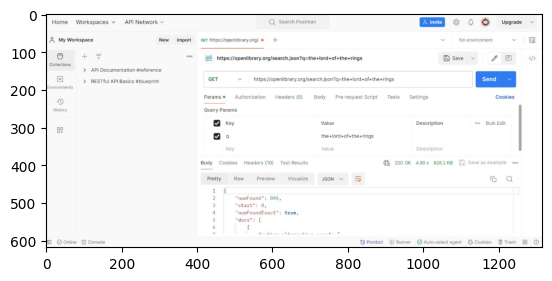

In [7]:
im = Image.open('/content/Скриншот от 2024-05-11 22-58-16.png')
plt.imshow(im)
plt.show()

In [8]:
ua = UserAgent() #### для указания "браузера"

In [9]:
category = input("Введите название интересующей Вас категории на английском языке (например: Park, Zoos, Museums и т.п.) : ")

Введите название интересующей Вас категории на английском языке (например: Park, Zoos, Museums и т.п.) : zoos


In [10]:
url = "https://api.foursquare.com/v3/places/search"

In [11]:
params = {
    'limit': 50,
    'query': category,
    'fields': 'name,location,rating'
}

In [12]:
headers = {
    "User-Agent": ua.firefox,
    "Accept": "application/json",
    "Authorization": "fsq3P6zWw5hrHAp69JoTu+0TFeYEBCEXDIo7+Ivypcz/4Uo="
}

In [13]:
response = requests.request("GET", url, params=params, headers=headers)

In [14]:
if response.status_code == 200:
    print("Успешный запрос API по URL: ", response.url)
else:
    print("Запрос API отклонен с кодом состояния:", response.status_code)

Успешный запрос API по URL:  https://api.foursquare.com/v3/places/search?limit=50&query=zoos&fields=name%2Clocation%2Crating


In [15]:
data = response.json()
### pprint(data) ### для отображения структуры ответа

In [16]:
establishments = []
for place in data['results']:
    place_name = place.get('name')
    place_address = place.get('location')['formatted_address']
    place_rating = place.get('rating') if 'rating' in place else "Рейтинг не определялся"
    establishments.append({'name': place_name, 'address': place_address, 'rating': place_rating})

In [17]:
for establishment in establishments:
        print(f"Название: {establishment['name']}")
        print(f"Адрес: {establishment['address']}")
        print(f"Рейтинг: {establishment['rating']}")
        print()

Название: Wildlife Habitat
Адрес: 3555 Las Vegas Blvd S (in the Flamingo Hotel & Casino), Las Vegas, NV 89109
Рейтинг: 8.5

Название: Lion Habitat Ranch
Адрес: 382 Bruner Ave (at Bermuda Rd), Henderson, NV 89044
Рейтинг: 7.7

Название: The Sports Bar at Mirage
Адрес: 3400 Las Vegas Blvd S, Las Vegas, NV 89109
Рейтинг: 7.4

Название: Siegfried and Roy's Secret Garden and Dolphin Habitat
Адрес: 3400 Las Vegas Blvd S (at The Mirage Hotel and Casino), Las Vegas, NV 89109
Рейтинг: 7.2

Название: Enviroguard 64 Broad Spectrum Disinfectant
Адрес: 3644 N Rancho Dr, Las Vegas, NV 89130
Рейтинг: Рейтинг не определялся

Название: Hammer Head International
Адрес: 2925 N Lamb Blvd, Las Vegas, NV 89115
Рейтинг: Рейтинг не определялся

Название: White Tiger Habitat at the Mirage
Адрес: 3400 Las Vegas Blvd S, Las Vegas, NV 89109
Рейтинг: Рейтинг не определялся

Название: Las Vegas Reptilian Nation Expo
Адрес: 2101 Texas Star Ln, North Las Vegas, NV 89032
Рейтинг: Рейтинг не определялся

Название: Dese